In [21]:
import pandas
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# 전체 데이터 분포 결측치 확인 및 타입 확인

In [13]:
dataset = pandas.read_csv("heart.csv")
print(dataset.info())
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 데이터 불균형 파악

In [7]:
dataset['target'].value_counts() / len(dataset)

target
1    0.513171
0    0.486829
Name: count, dtype: float64

# SEMMA: Sampling

In [19]:
y = dataset['target']
X = dataset.drop('target', axis=1)
temp_X, test_X, temp_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
train_X, valid_X, train_y, valid_y = train_test_split(temp_X, temp_y, test_size=0.2, random_state=0, stratify=temp_y)



# SEMMA: Exploration

# 데이터 분포 파악

## 변수 상관 관계 그리기

<Axes: >

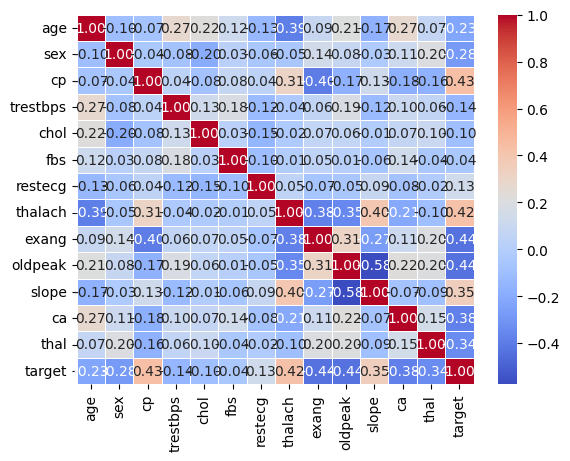

In [11]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

## 변수 분포 그리기

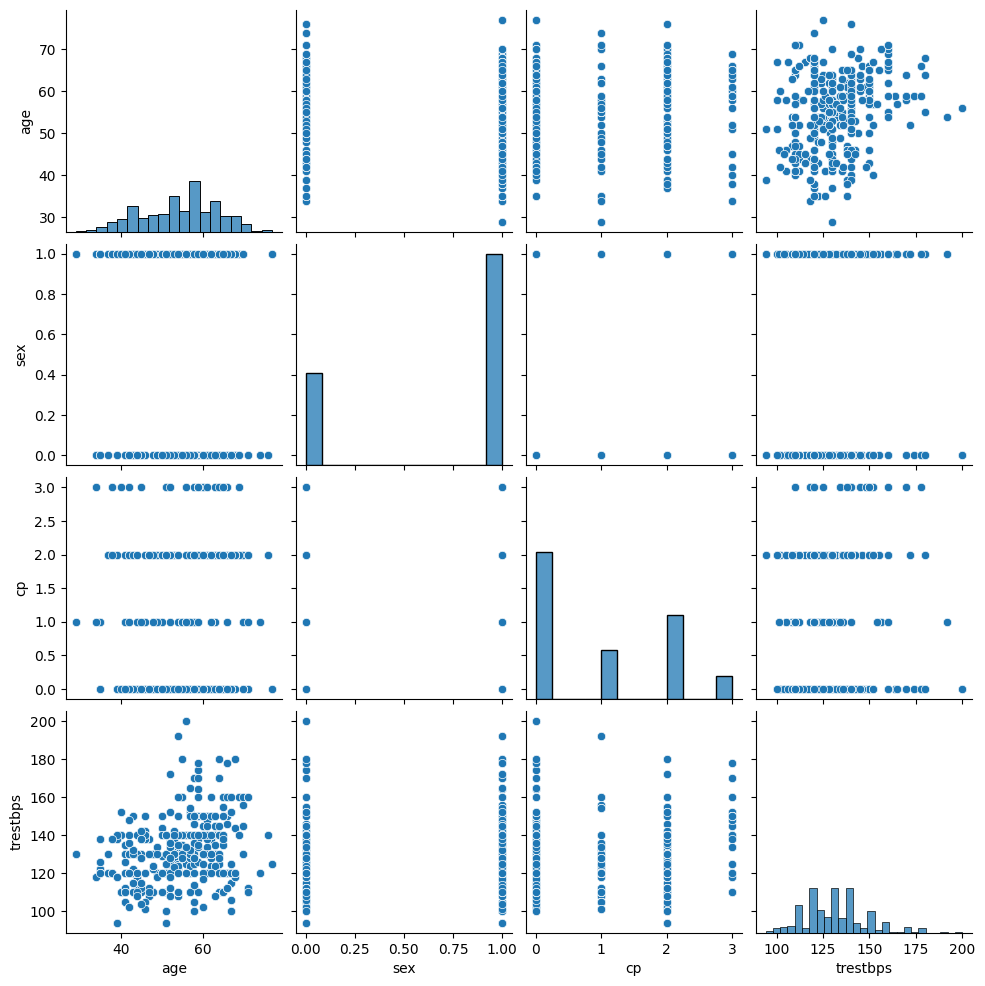

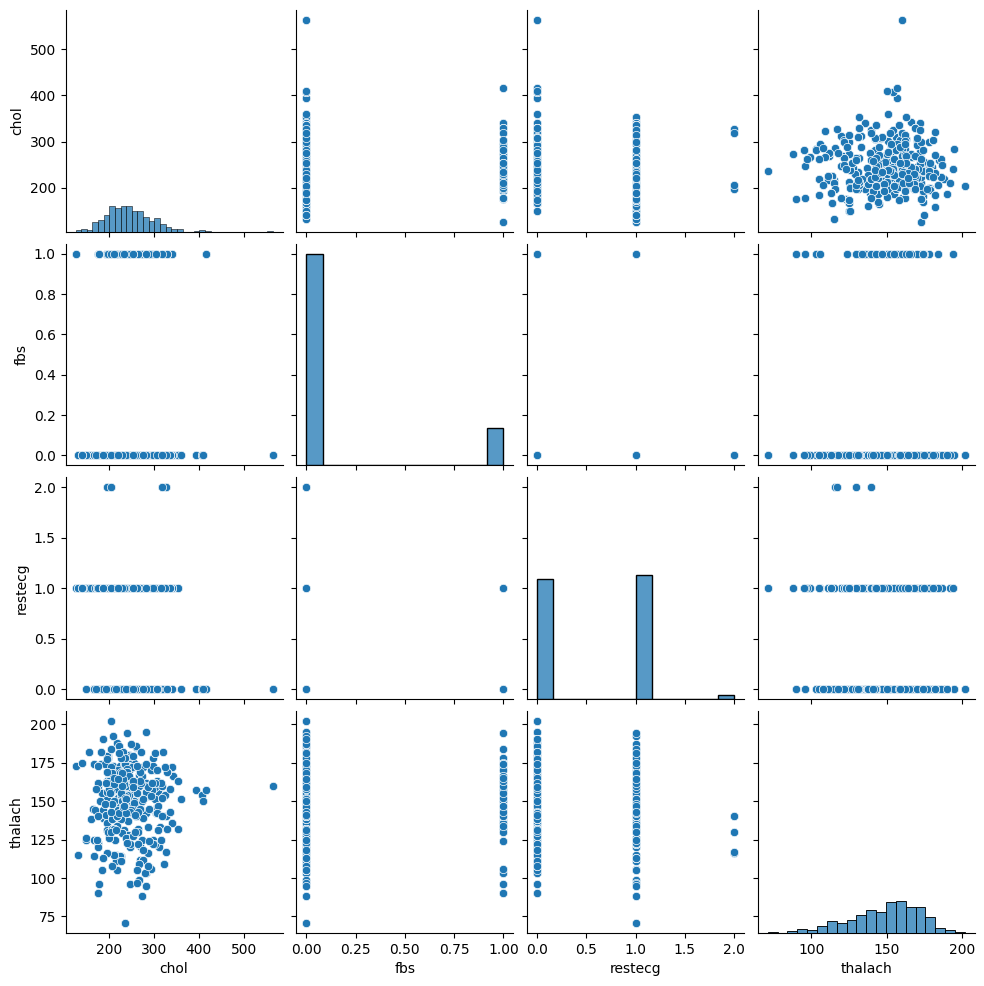

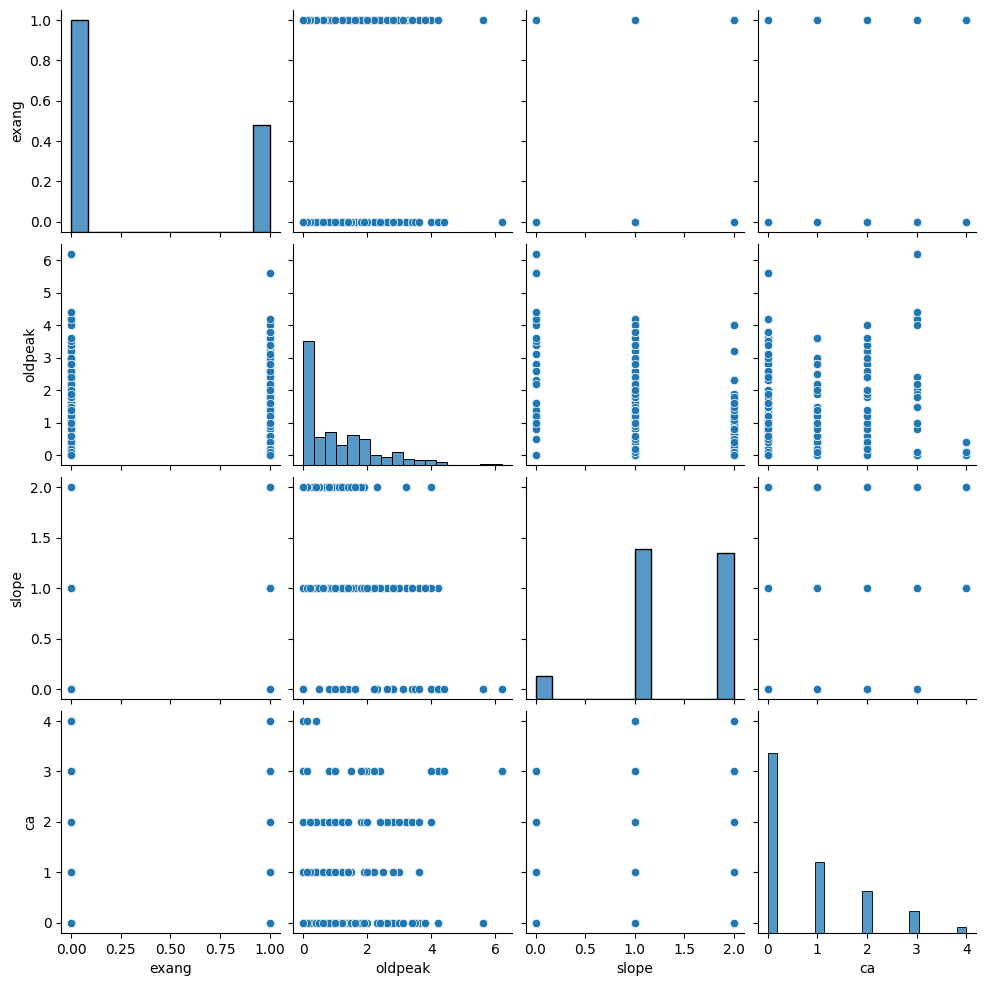

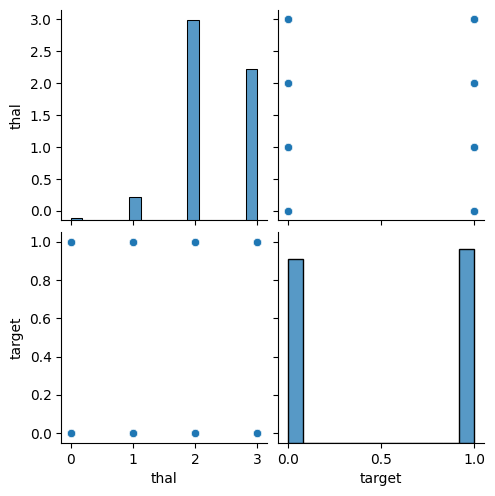

In [22]:
def plot_pairplot_in_chunks(dataset, chunk_size=4):
    num_columns = len(dataset.columns)
    num_chunks = math.ceil(num_columns / chunk_size)  # 전체 데이터를 나눌 그룹의 개수
    
    for i in range(num_chunks):
        start_col = i * chunk_size
        end_col = min(start_col + chunk_size, num_columns)  # 마지막 chunk는 남은 열을 모두 포함
        sns.pairplot(dataset.iloc[:, start_col:end_col])

# 예시: dataset 열을 4개씩 나눠서 pairplot 그리기
plot_pairplot_in_chunks(dataset, chunk_size=4)